# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [31]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [32]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [33]:
adver_data.head(5)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [34]:
# data statistics
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [35]:
import numpy as np
# set features arrays 
X = np.array(adver_data.values[:, 0:3])
# set target value array
y = np.array(adver_data.values[:, 3])
# check the result
adver_data.head(1), X[0], y[0]

(      TV  Radio  Newspaper  Sales
 1  230.1   37.8       69.2   22.1, array([230.1,  37.8,  69.2]), 22.1)

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [36]:
# NumPy needs axis=0 for to get i-element from each column 
# and axis=1 for to get i-element from each row
means, stds = np.mean(X, axis=0), np.std(X, axis=0)
# check the result
adver_data.head(1), means, stds

(      TV  Radio  Newspaper  Sales
 1  230.1   37.8       69.2   22.1,
 array([147.0425,  23.264 ,  30.554 ]),
 array([85.63933176, 14.80964564, 21.72410606]))

In [37]:
X = (X - means)/stds
# check the result
X[0]
# the easeiest way is:
#from sklearn import preprocessing
# normalize the data attributes
#normalized_X = preprocessing.normalize(X)
# standardize the data attributes
#standardized_X = preprocessing.scale(X)

array([0.96985227, 0.98152247, 1.77894547])

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [38]:
# np.shape method returns a matrix size. the first number (ZERO-index) is a count of rows
# the second one (ONE-index) is a count of columns
X_matrix_rows = np.shape(X)[0]
# np.ones method gets as an argument a count of elements N and makes an array.
# array consists from 1
ones_array = np.ones(X_matrix_rows)
# np.reshape method gets ones_array matrix and returns a matrix from m=X_matrix_rows rows
# and n=1 columns
ones_matrix = np.reshape(ones_array,(X_matrix_rows,1))
# np.hstack method adds each ones_matrix i-row to the end of the X matrix i-row
X = np.hstack((X,ones_matrix))
# check the result
X[0]

array([0.96985227, 0.98152247, 1.77894547, 1.        ])

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [39]:
# "y" means a target value. I have it as y = np.array(adver_data.values[:, 3]), Sales column
# "y_pred" means a predicted value
def mserror(y, y_pred):
    # 'mean squared error' = (sum('target value'[i] - 'predicted value'[i])**2)/'number of cases'
    return np.mean((y-y_pred)**2)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [40]:
# np.median method returns a median value for an array
y_median = np.median(y)
# get "y median" as "y predicted" 
answer1 = mserror(y,y_median)
print answer1
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [41]:
def normal_equation(X, y):
    # bases on definition "transponed X" by "X" is "transponed X" by "y"
    # get transponed X matrix 
    transponed_X = X.T
    # matrix multiplying
    XT_X_multi = np.dot(transponed_X, X)
    XT_y_multi = np.dot(transponed_X, y)
    # np.linalg.solve method solves multiplies of matrix XT_X_multi on free vector XT_y_multi
    return np.linalg.solve(XT_X_multi, XT_y_multi)
    ## np.linalg.inv method needs for calculate the inverse of a matrix

In [42]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)
# the simplest way - by LinearRegression method from sklearn.linear_model:
#from sklearn.linear_model import LinearRegression
#X = np.array(adver_data.values[:, 0:3])
#y = np.array(adver_data.values[:, 3])
#regressor = LinearRegression()
#regressor.fit(X, y)
#regressor.coef_ , np.mean(y)

[ 3.91925365  2.79206274 -0.02253861 14.0225    ]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [43]:
# playing by weights as 0:
tv_features = 0.0
radio_features = 0.0
newspapers_features = 0.0
instead_of_w0_feature = 1.0
# the prediction for Sales
answer2 = np.sum([tv_features, radio_features, newspapers_features, 
                  instead_of_w0_feature]*norm_eq_weights)
print(answer2)
write_answer_to_file(answer2, '2.txt')

14.022500000000004


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [44]:
# a linear prediction vector is a multiplying of features matrix by weights vector
def linear_prediction(X, w):
    return np.dot(X,w)
# check the linear_prediction function
linear_prediction(X, w=norm_eq_weights)[0]

20.523974409715166

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [45]:
lin_pred = linear_prediction(X,norm_eq_weights)
# 'the Sales target value mean squared error' = 
# (sum('target value'[i] - 'linear predicted value'[i])**2)/'number of cases'
answer3 = mserror(y,lin_pred)
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.784126314510936


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [46]:
# X - features matrix
# y - target vector
# w - weigth vector
# train_ind - the index of the object of the training sample (the row of the matrix X number)
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    return w + 2 * eta/X.shape[0] * X[train_ind] * (y[train_ind] - linear_prediction(X[train_ind], w))
# check the stochastic_gradient_step function
stochastic_gradient_step(X, y, w=norm_eq_weights, train_ind=1, eta=0.01)

array([ 3.91948569,  2.79185291, -0.02266836, 14.02230621])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [47]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    # IEEE 754 standard NumPy constant floating point representation of (positive) infinity
    # take an initial weigth distance as infinity
    weight_dist = np.inf
    # Инициализируем вектор весов
    # take an initial weight vector as np.zeros(X.shape[1]) 
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    # np.random.seed(seed) makes the repeatable random result
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        # Ваш код здесь
        w_new = stochastic_gradient_step(X, y, w, random_ind, eta)
        weight_dist = np.linalg.norm(w - w_new)
        w = w_new
        errors.append(mserror(y, linear_prediction(X, w)))
        iter_num += 1
        
    return w, errors
# check the stochastic_gradient_descent function
stochastic_gradient_descent(X, y, w_init=np.zeros(X.shape[1]), eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False)

(array([2.48883009, 1.71429214, 0.43255158, 8.842743  ]),
 [223.66538899863156,
  223.63640485031922,
  223.55491009541456,
  223.4807624515579,
  223.47256426508545,
  223.44655231890474,
  223.39175144920213,
  223.3214521757322,
  223.2707462145908,
  223.2585746385283,
  223.20263393030626,
  223.1464246501442,
  223.1182865596016,
  223.05639626029313,
  223.01523254529158,
  222.99035057946475,
  222.98741420324143,
  222.96901770985096,
  222.87192976119704,
  222.84459487822633,
  222.78857273967887,
  222.76972781414096,
  222.72086214383265,
  222.70490416801397,
  222.69156394466313,
  222.63455887297178,
  222.56452772523568,
  222.52385945121242,
  222.49253589220314,
  222.45710958268128,
  222.42121099760504,
  222.37014375278872,
  222.26235109722083,
  222.21264479327613,
  222.1557583870522,
  222.08211118403963,
  222.07508646895414,
  222.06806832747162,
  222.0392433526464,
  222.03223515214347,
  222.00362710089578,
  221.99280835153607,
  221.91322993552527,
  22

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [48]:
# if I need to measure the calculating time 
#%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(
    X, y, w_init=np.zeros(X.shape[1]), eta=1e-2, min_weight_dist=1e-8, seed=42, 
    max_iter=1e5, verbose=False)
# check the result
stoch_grad_desc_weights, stoch_errors_by_iter

(array([ 3.91069256e+00,  2.78209808e+00, -8.10462217e-03,  1.40190566e+01]),
 [223.66538899863156,
  223.63640485031922,
  223.55491009541456,
  223.4807624515579,
  223.47256426508545,
  223.44655231890474,
  223.39175144920213,
  223.3214521757322,
  223.2707462145908,
  223.2585746385283,
  223.20263393030626,
  223.1464246501442,
  223.1182865596016,
  223.05639626029313,
  223.01523254529158,
  222.99035057946475,
  222.98741420324143,
  222.96901770985096,
  222.87192976119704,
  222.84459487822633,
  222.78857273967887,
  222.76972781414096,
  222.72086214383265,
  222.70490416801397,
  222.69156394466313,
  222.63455887297178,
  222.56452772523568,
  222.52385945121242,
  222.49253589220314,
  222.45710958268128,
  222.42121099760504,
  222.37014375278872,
  222.26235109722083,
  222.21264479327613,
  222.1557583870522,
  222.08211118403963,
  222.07508646895414,
  222.06806832747162,
  222.0392433526464,
  222.03223515214347,
  222.00362710089578,
  221.99280835153607,
  221.

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

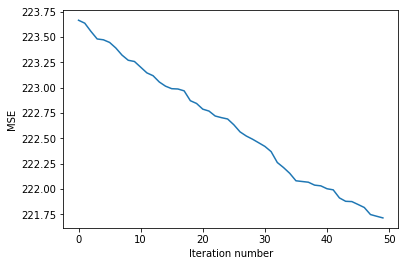

In [49]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

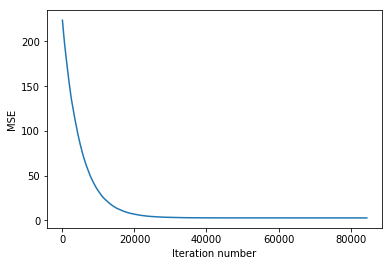

In [50]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [51]:
stoch_grad_desc_weights

array([ 3.91069256e+00,  2.78209808e+00, -8.10462217e-03,  1.40190566e+01])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [52]:
stoch_errors_by_iter[-1]

2.784412588406704

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [53]:
# mean squared error function gets 'y' as a target value and 'y_pred' as a predicted value
# I have 'y' as y = np.array(adver_data.values[:, 3]) form above
# My 'y_pred' value is a linear prediction vector
# a linear prediction vector is a multiplying of features matrix by weights vector
# def linear_prediction(X, w): np.dot(X,w)
# I have 'X' form above too
# 'w' is weights I recived from stochastic gradient descent 
# I have it as stoch_grad_desc_weights from above too
answer4 = mserror(y, linear_prediction(X, stoch_grad_desc_weights))
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.784412588406704


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**